Play the betting game at https://gamesfortraders.com/coin-challenge/. The game works like this.
* A biased coin that comes up heads 60% of the time is flipped repeatedly.
* You start with USD250 and can bet any available amount of money on the next coin flip.
* Select Heads or Tails and how much money you want to bet.
* If you predicted the outcome of the coin flip correctly, you get back double your bet (if
you bet $10 you get back your original bet and an extra $10).
* If you were wrong about the outcome you get back nothing (you lose the full amount you
bet).

Strategy to maximise expected returns over 20 rounds of play:
Because heads has a 60% probability -> E(heads)=1.2, whereas tails only has 40% probability -> E(tails)=0.8, it will always be better to play heads. Consequently, the question of strategy boils down to the optimal size of the bet to make at each round.
Thinking at the extremes, it quickly becomes clear that we need a strategy which accounts for the number of remaining rounds. For example, if there is only one round left, there is no opportunity cost in foregoing future rounds of play by going bankrupt and thus betting all the money on heads will maximise expected money at the end of the game. However, it is clear that it is not optimal to bet it all on heads at round 1 of 20, as that would entail a 40% chance of having 0 money at the end of the game. Of course, an additional complexity is that it depends also on the odds of winning/going bust. For example, we if the P(heads)=1, we would always want to bet all our money every round, as there was no risk of going bust.

We need a function that end predicts increasing bets each round, leading to a 100% bet on the last round. The slope of this function depends on some combination of the odds of winning and the number of rounds remaining (I think this game has the markov property in that the history of bets does not matter, only the number of games in the future).

PLotting some candidate functions in Mathematica, I ended up with this: $1-(1-p(win))*(1-(1/roundsRemaining))$. It might not be perfect but it has the characteristics I wanted. For one round left, it wants to bet everything. For p_win 1, you always want to bet everything. FOr p(win)=0.6, it increases from an inital bet proportion of 0.62, which sounds reasonable. Let's try it out:

I played it: it did not go very well, I had exactly 1 dollar left at the last round, and then the game quit without showing my results after i put in the bet. Here a picture of that:

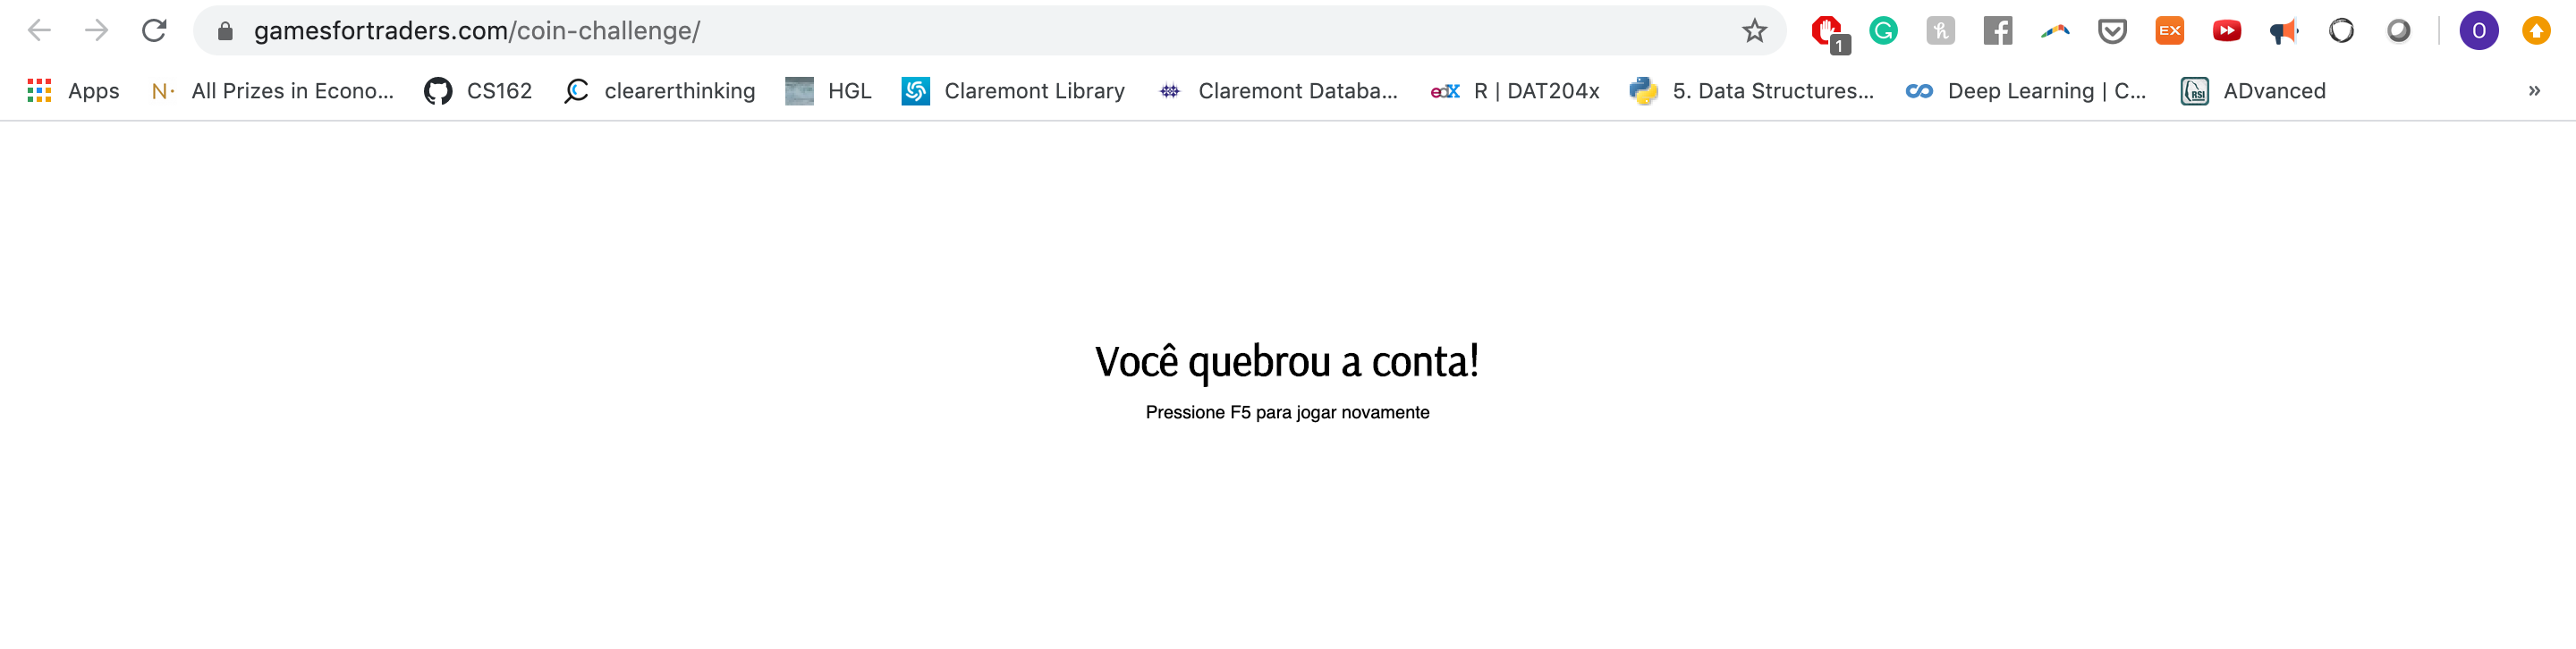

I will not play again as computing the bet manually for every round was a pain and i'd much rather have python do it in a simulation.

In [6]:
from random import random
import numpy as np
import matplotlib.pyplot as plt

def bet_size(rounds_remaining, p_win=0.6):
    '''Takes the number of rounds remaining,
    returns the bet size as a proportion of total wealth'''
    
    return 1-(1-p_win)*(1-(1/rounds_remaining))

def game():
    #Starting money
    cash = 250
    
    #For 20 rounds
    for rounds_remaining in reversed(range(1, 21)):
        
        #Compute betsize
        #bet = bet_size(rounds_remaining)*cash
        bet = cash
        
        #Flip biased coin
        if random() < 0.6:
            #if win
            cash += bet
        else:
            #if lose
            cash -= bet
            
            #If bust, return 0
            if cash <= 0:
                return 0
    
    return cash

In [7]:
#Run 100000 simulations
returns = [game() for _ in range(1000000)]

In [8]:
print("expected return of strategy:", np.mean(returns))

expected return of strategy: 10223.616


In [9]:
np.mean(np.array(returns) < 250)

0.999961

In [ ]:
print("expected return of strategy:", np.mean(returns))
plt.hist(returns, bins="auto", density=True)
plt.xlabel("Returns after 20 rounds")
plt.ylabel("Density")
plt.show()

expected return of strategy: 3159.6811584564125


The average returns are 3159.6811584564125 across 10000 simulations. Which seems respectable, I look forward to comparing it to the strats of classmates to get a reference point against which to evaluate the strategy. Fun pre-class!